## Numerical phase-plane analysis of the Hodgkin-Huxley neuron
* https://nest-simulator.readthedocs.io/en/latest/auto_examples/hh_phaseplane.html


In [8]:
import nest
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [9]:

amplitude = 200.0  # Set externally applied current amplitude in pA
dt = 0.1  # simulation step length [ms]

v_min = -100.0  # Min membrane potential
v_max = 42.0  # Max membrane potential
n_min = 0.1  # Min inactivation variable
n_max = 0.81  # Max inactivation variable
delta_v = 2.0  # Membrane potential step length
delta_n = 0.01  # Inactivation variable step length

V_vec = np.arange(v_min, v_max, delta_v)
n_vec = np.arange(n_min, n_max, delta_n)

num_v_steps = len(V_vec)
num_n_steps = len(n_vec)


In [10]:

nest.ResetKernel()
nest.set_verbosity("M_ERROR")
nest.resolution = dt


In [11]:

neuron = nest.Create("hh_psc_alpha")

# Numerically obtain equilibrium state
nest.Simulate(1000)

m_eq = neuron.Act_m
h_eq = neuron.Inact_h

neuron.I_e = amplitude  # Apply external current

# Scan state space
print("Scanning phase space")


Scanning phase space


In [12]:

V_matrix = np.zeros([num_n_steps, num_v_steps])
n_matrix = np.zeros([num_n_steps, num_v_steps])

# pp_data will contain the phase-plane data as a vector field
pp_data = np.zeros([num_n_steps * num_v_steps, 4])

count = 0
for i, V in enumerate(V_vec):
    for j, n in enumerate(n_vec):
        # Set V_m and n
        neuron.set(V_m=V, Act_n=n, Act_m=m_eq, Inact_h=h_eq)
        # Find state
        V_m = neuron.V_m
        Act_n = neuron.Act_n

        # Simulate a short while
        nest.Simulate(dt)

        # Find difference between new state and old state
        V_m_new = neuron.V_m - V
        Act_n_new = neuron.Act_n - n

        # Store in vector for later analysis
        V_matrix[j, i] = abs(V_m_new)
        n_matrix[j, i] = abs(Act_n_new)
        pp_data[count] = np.array([V_m, Act_n, V_m_new, Act_n_new])

        if count % 10 == 0:
            # Write updated state next to old state
            print("")
            print("Vm:  \t", V_m)
            print("new Vm:\t", V_m_new)
            print("Act_n:", Act_n)
            print("new Act_n:", Act_n_new)

        count += 1

# Set state for AP generation
neuron.set(V_m=-34.0, Act_n=0.2, Act_m=m_eq, Inact_h=h_eq)

print("")
print("AP-trajectory")


Vm:  	 -100.0
new Vm:	 1.5712492561463165
Act_n: 0.1
new Act_n: -0.001418012708614455

Vm:  	 -100.0
new Vm:	 1.6850279335060634
Act_n: 0.19999999999999996
new Act_n: -0.0033646913133008327

Vm:  	 -100.0
new Vm:	 2.170636778092444
Act_n: 0.29999999999999993
new Act_n: -0.0052896800339886085

Vm:  	 -100.0
new Vm:	 3.4238921195448313
Act_n: 0.3999999999999998
new Act_n: -0.007156049059011571

Vm:  	 -100.0
new Vm:	 5.8285476231452975
Act_n: 0.4999999999999998
new Act_n: -0.008907518092107658

Vm:  	 -100.0
new Vm:	 9.482406551959414
Act_n: 0.5999999999999998
new Act_n: -0.010486016888911043

Vm:  	 -100.0
new Vm:	 13.91504367018949
Act_n: 0.6999999999999996
new Act_n: -0.01186869893156961

Vm:  	 -100.0
new Vm:	 18.105654374081368
Act_n: 0.7999999999999996
new Act_n: -0.013104962037741918

Vm:  	 -98.0
new Vm:	 1.596770528390195
Act_n: 0.18999999999999995
new Act_n: -0.003011496621646098

Vm:  	 -98.0
new Vm:	 1.9910086943375518
Act_n: 0.2899999999999999
new Act_n: -0.0049044256484134

In [13]:

# ap will contain the trace of a single action potential as one possible
# numerical solution in the vector field
ap = np.zeros([1000, 2])
for i in range(1000):
    # Find state
    V_m = neuron.V_m
    Act_n = neuron.Act_n

    if i % 10 == 0:
        # Write new state next to old state
        print("Vm: \t", V_m)
        print("Act_n:", Act_n)
    ap[i] = np.array([V_m, Act_n])

    # Simulate again
    neuron.set(Act_m=m_eq, Inact_h=h_eq)
    nest.Simulate(dt)

# Make analysis
print("")
print("Plot analysis")

nullcline_V = []
nullcline_n = []

print("Searching nullclines")
for i in range(0, len(V_vec)):
    index = np.nanargmin(V_matrix[:][i])
    if index != 0 and index != len(n_vec):
        nullcline_V.append([V_vec[i], n_vec[index]])

    index = np.nanargmin(n_matrix[:][i])
    if index != 0 and index != len(n_vec):
        nullcline_n.append([V_vec[i], n_vec[index]])


Vm: 	 -34.0
Act_n: 0.2
Vm: 	 -38.77131320029319
Act_n: 0.343588338047623
Vm: 	 -55.88427094701383
Act_n: 0.3956993864501419
Vm: 	 -64.5359364474007
Act_n: 0.3928091825496094
Vm: 	 -66.74513193311815
Act_n: 0.37789747443105365
Vm: 	 -66.78801323672116
Act_n: 0.3633524818204755
Vm: 	 -66.1933106923566
Act_n: 0.3520431911433686
Vm: 	 -65.48358155231833
Act_n: 0.34424562228018424
Vm: 	 -64.85378430322174
Act_n: 0.3394267522250606
Vm: 	 -64.37134779736594
Act_n: 0.33682563550438865
Vm: 	 -64.04336258985255
Act_n: 0.3356987504820231
Vm: 	 -63.846917536227565
Act_n: 0.335434182260882
Vm: 	 -63.74738743552317
Act_n: 0.33559127439697206
Vm: 	 -63.71025037247236
Act_n: 0.335892309976809
Vm: 	 -63.707538662607256
Act_n: 0.3361882990271899
Vm: 	 -63.71991333611718
Act_n: 0.33641744528183976
Vm: 	 -63.73590641823505
Act_n: 0.3365684166251425
Vm: 	 -63.74990546222657
Act_n: 0.33665361258107207
Vm: 	 -63.75999987211721
Act_n: 0.3366926477684147
Vm: 	 -63.76624969545051
Act_n: 0.33670383933386244
Vm: 

Plotting vector field


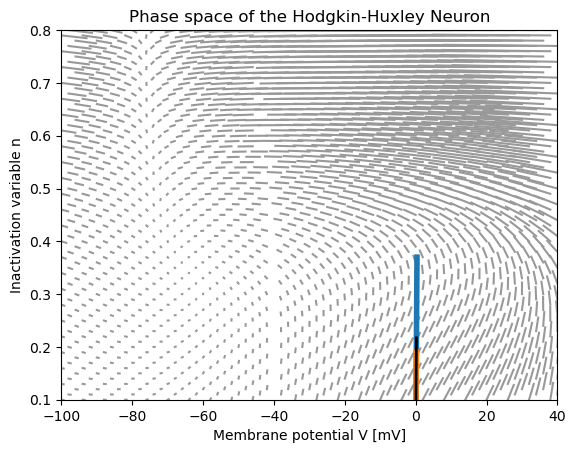

In [18]:

print("Plotting vector field")
factor = 0.4
for i in range(0, np.shape(pp_data)[0], 3):
    plt.plot(
        [pp_data[i][0], pp_data[i][0] + factor * pp_data[i][2]],
        [pp_data[i][1], pp_data[i][1] + factor * pp_data[i][3]],
        color=[0.6, 0.6, 0.6],
    )

plt.plot(nullcline_V[:][0], nullcline_V[:][1], linewidth=4.0)
plt.plot(nullcline_n[:][0], nullcline_n[:][1], linewidth=4.0)

plt.xlim([V_vec[0], V_vec[-1]])
plt.ylim([n_vec[0], n_vec[-1]])

plt.plot(ap[:][0], ap[:][1], color="black", linewidth=2.0)

plt.xlabel("Membrane potential V [mV]")
plt.ylabel("Inactivation variable n")
plt.title("Phase space of the Hodgkin-Huxley Neuron")

plt.show()